In [1]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.8.0


In [3]:
mnist = tf.keras.datasets.mnist
# 28x28 images of hand-written digits 0-9

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [5]:
import matplotlib.pyplot as plt

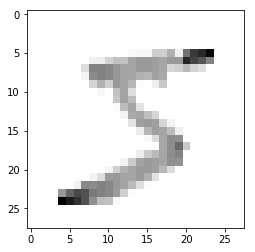

In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 75us/step - loss: 0.2615 - acc: 0.9237
Epoch 2/3
60000/60000 [==============================] - 4s 72us/step - loss: 0.1076 - acc: 0.9668: 0s - loss: 0.1089 - acc
Epoch 3/3
60000/60000 [==============================] - 5s 76us/step - loss: 0.0734 - acc: 0.9763


In [37]:
 val_loss, val_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 40us/step


In [38]:
print(val_loss,val_acc)

0.08890399365695194 0.9737


In [39]:
model.save('digit_model.model')

In [48]:
new_model = tf.keras.models.load_model('digit_model.model')

In [49]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [42]:
predictions = new_model.predict([x_test])

In [43]:
print(predictions)

[[6.4351418e-08 3.7127796e-07 4.2672746e-05 ... 9.9991000e-01
  3.7023117e-08 7.1029866e-08]
 [8.2864671e-10 1.1620310e-03 9.9883050e-01 ... 1.3912196e-10
  1.3385693e-09 9.0913214e-11]
 [1.8792301e-07 9.9979085e-01 1.0311827e-05 ... 2.4786756e-05
  1.3721503e-04 7.7457353e-06]
 ...
 [2.2964754e-08 5.1822821e-07 1.2105593e-08 ... 2.5494091e-05
  3.1747675e-07 2.4327004e-05]
 [1.6154983e-07 1.7169589e-07 1.8183492e-08 ... 7.0212977e-08
  3.5798184e-05 5.3749510e-08]
 [9.4811917e-08 2.6797920e-08 4.0668887e-08 ... 5.6224175e-11
  4.6082547e-09 5.3979399e-10]]


In [44]:
import numpy as np

In [45]:
print(np.argmax(predictions[0]))

7


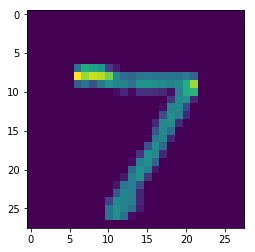

In [46]:
plt.imshow(x_test[0])
plt.show()